In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/g-research-crypto-forecasting/example_sample_submission.csv
/kaggle/input/g-research-crypto-forecasting/asset_details.csv
/kaggle/input/g-research-crypto-forecasting/example_test.csv
/kaggle/input/g-research-crypto-forecasting/train.csv
/kaggle/input/g-research-crypto-forecasting/supplemental_train.csv
/kaggle/input/g-research-crypto-forecasting/gresearch_crypto/competition.cpython-37m-x86_64-linux-gnu.so
/kaggle/input/g-research-crypto-forecasting/gresearch_crypto/__init__.py


In [2]:
import os
import numpy as np
import pandas as pd
import datetime as datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

cmap = sns.color_palette()

In [3]:
asset_df = pd.read_csv("/kaggle/input/g-research-crypto-forecasting/asset_details.csv")
asset_df.sort_values('Weight', ascending=False)

,Asset_ID,Weight,Asset_Name
2,1,6.779922,Bitcoin
5,6,5.894403,Ethereum
10,3,4.406719,Cardano
1,0,4.304065,Binance Coin
13,4,3.555348,Dogecoin
0,2,2.397895,Bitcoin Cash
6,9,2.397895,Litecoin
4,7,2.079442,Ethereum Classic
9,12,2.079442,Stellar
8,13,1.791759,TRON


In [4]:
asset_df['Weight'].sum()

40.879847092769616

In [5]:
asset_df['weight_percentage'] = (asset_df['Weight']/asset_df['Weight'].sum())*100
asset_df.sort_values('Weight', ascending=False)

,Asset_ID,Weight,Asset_Name,weight_percentage
2,1,6.779922,Bitcoin,16.584998
5,6,5.894403,Ethereum,14.418848
10,3,4.406719,Cardano,10.779686
1,0,4.304065,Binance Coin,10.528574
13,4,3.555348,Dogecoin,8.697068
0,2,2.397895,Bitcoin Cash,5.865715
6,9,2.397895,Litecoin,5.865715
4,7,2.079442,Ethereum Classic,5.086716
9,12,2.079442,Stellar,5.086716
8,13,1.791759,TRON,4.382990


In [6]:
fig = px.pie(data_frame=asset_df, values='weight_percentage', names='Asset_Name', 
             title='Percentage Weight of Each Cryptocurrency Asset')
fig.show()

In [7]:
crypto_df = pd.read_csv("/kaggle/input/g-research-crypto-forecasting/train.csv")
crypto_df.shape

(24236806, 10)

In [8]:
crypto_df.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264


In [9]:
asset_names_dict = {row['Asset_Name']:row['Asset_ID'] for ind, row in asset_df.iterrows()}
asset_names_dict

{'Bitcoin Cash': 2,
 'Binance Coin': 0,
 'Bitcoin': 1,
 'EOS.IO': 5,
 'Ethereum Classic': 7,
 'Ethereum': 6,
 'Litecoin': 9,
 'Monero': 11,
 'TRON': 13,
 'Stellar': 12,
 'Cardano': 3,
 'IOTA': 8,
 'Maker': 10,
 'Dogecoin': 4}

In [10]:
asset_names = ['Bitcoin Cash',
 'Binance Coin',
 'Bitcoin',
 'EOS.IO',
 'Ethereum Classic',
 'Ethereum',
 'Litecoin',
 'Monero',
 'TRON',
 'Stellar',
 'Cardano',
 'IOTA',
 'Maker',
 'Dogecoin']

time_list=[]
for coin in asset_names:
    coin_df = crypto_df[crypto_df['Asset_ID']==asset_names_dict[coin]].set_index('timestamp')
    start_time = coin_df.index[0].astype('datetime64[s]')
    end_time = coin_df.index[-1].astype('datetime64[s]')
    time_list.append([coin, start_time, end_time])
    
time_df = pd.DataFrame(time_list)
time_df.columns = ['Asset_Names', 'Start_Date', 'End_Date']
time_df

,Asset_Names,Start_Date,End_Date
0,Bitcoin Cash,2018-01-01 00:01:00,2021-09-21
1,Binance Coin,2018-01-01 00:01:00,2021-09-21
2,Bitcoin,2018-01-01 00:01:00,2021-09-21
3,EOS.IO,2018-01-01 00:01:00,2021-09-21
4,Ethereum Classic,2018-01-01 00:01:00,2021-09-21
5,Ethereum,2018-01-01 00:01:00,2021-09-21
6,Litecoin,2018-01-01 00:01:00,2021-09-21
7,Monero,2018-01-01 00:01:00,2021-09-21
8,TRON,2018-02-06 21:37:00,2021-09-21
9,Stellar,2018-02-16 23:53:00,2021-09-21


In [11]:
crypto_df.isnull().sum()

timestamp         0
Asset_ID          0
Count             0
Open              0
High              0
Low               0
Close             0
Volume            0
VWAP              9
Target       750338
dtype: int64

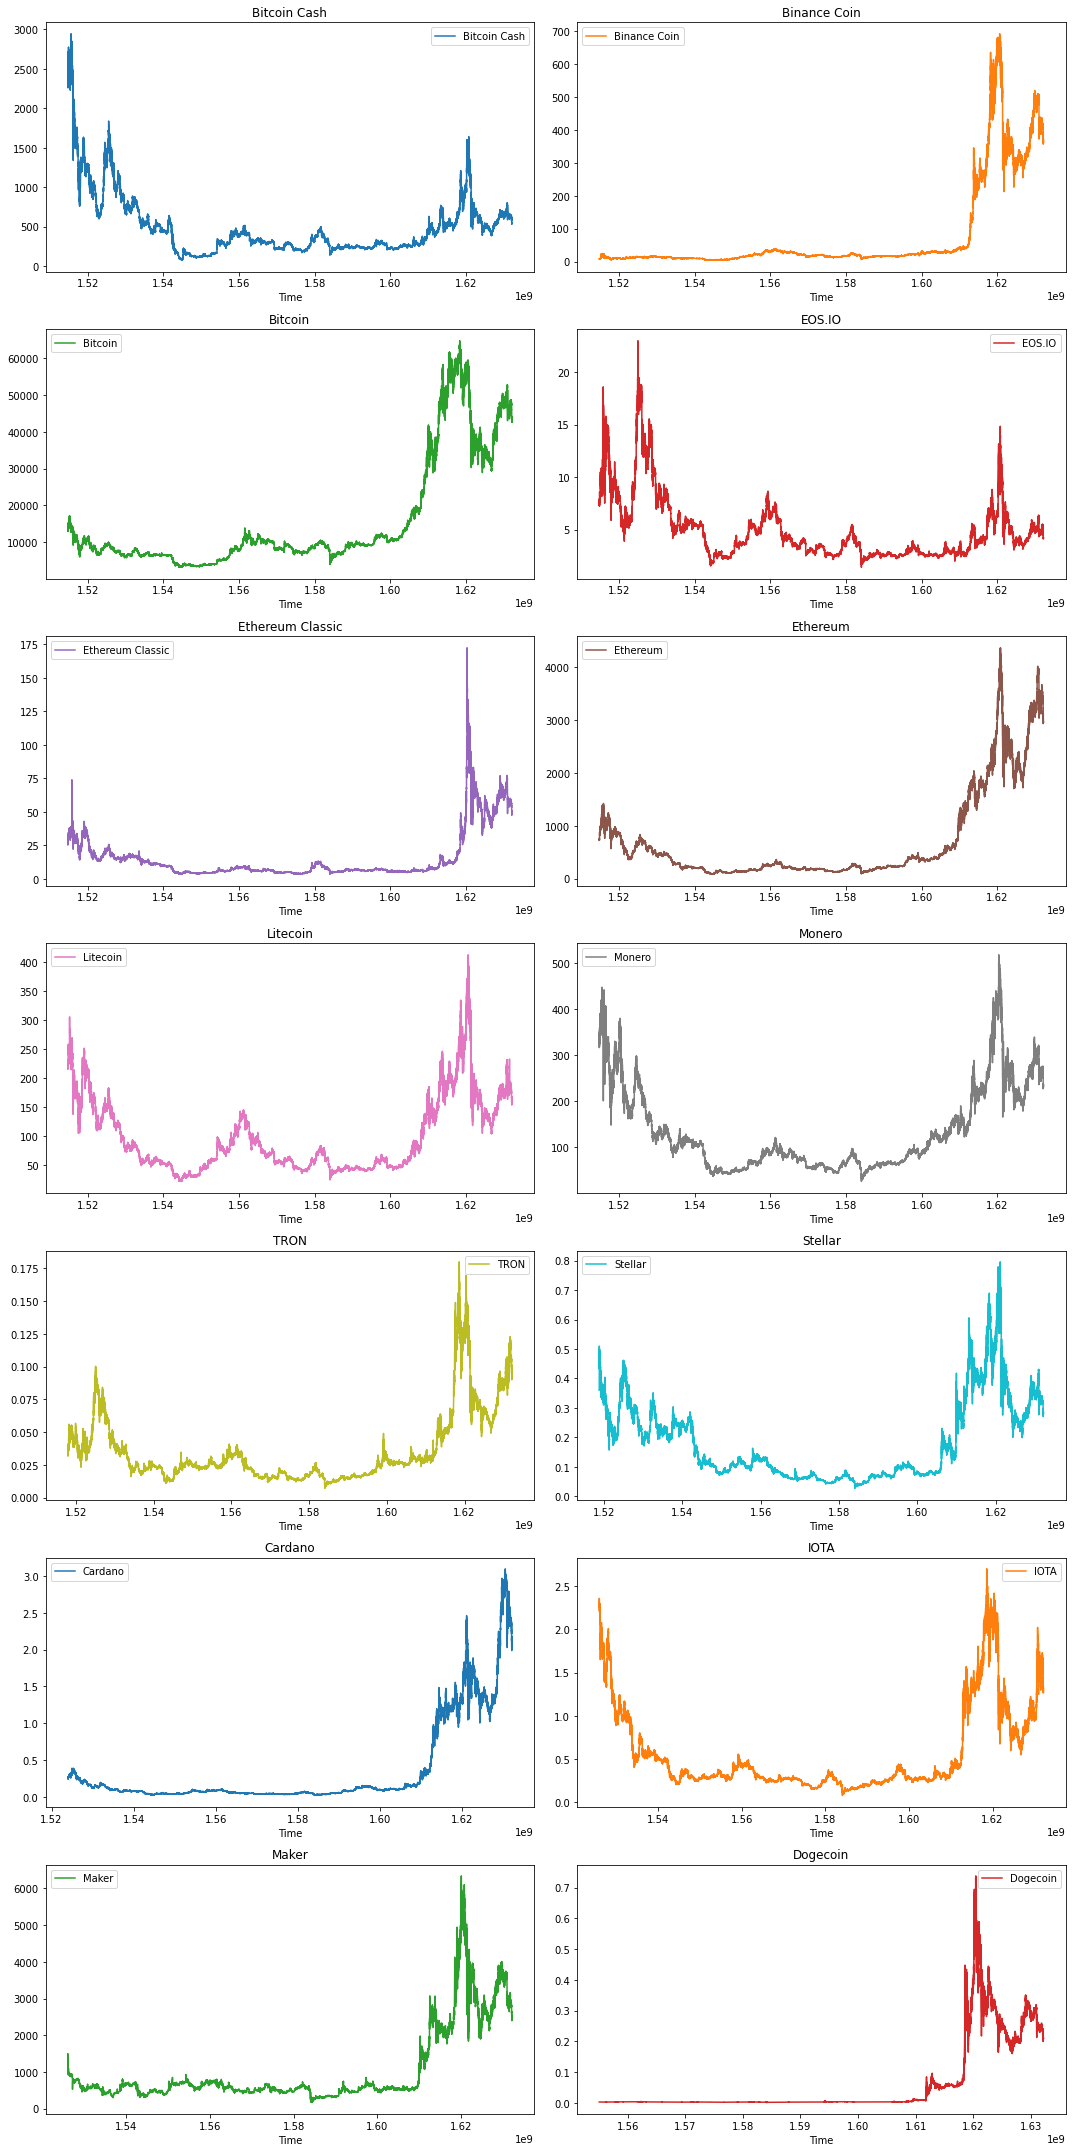

In [12]:
f = plt.figure(figsize=(15,30))

for ind, coin in enumerate(asset_names):
    coin_df = crypto_df[crypto_df['Asset_ID']==asset_names_dict[coin]].set_index('timestamp')
    coin_df = coin_df.reindex(range(coin_df.index[0], coin_df.index[-1]+60, 60), method='pad')
    ax = f.add_subplot(7, 2, ind+1)
    plt.plot(coin_df['Close'], label=coin, color=cmap[ind%10])
    plt.legend()
    plt.xlabel('Time')
    plt.title(coin)
    
    
plt.tight_layout()
plt.show()

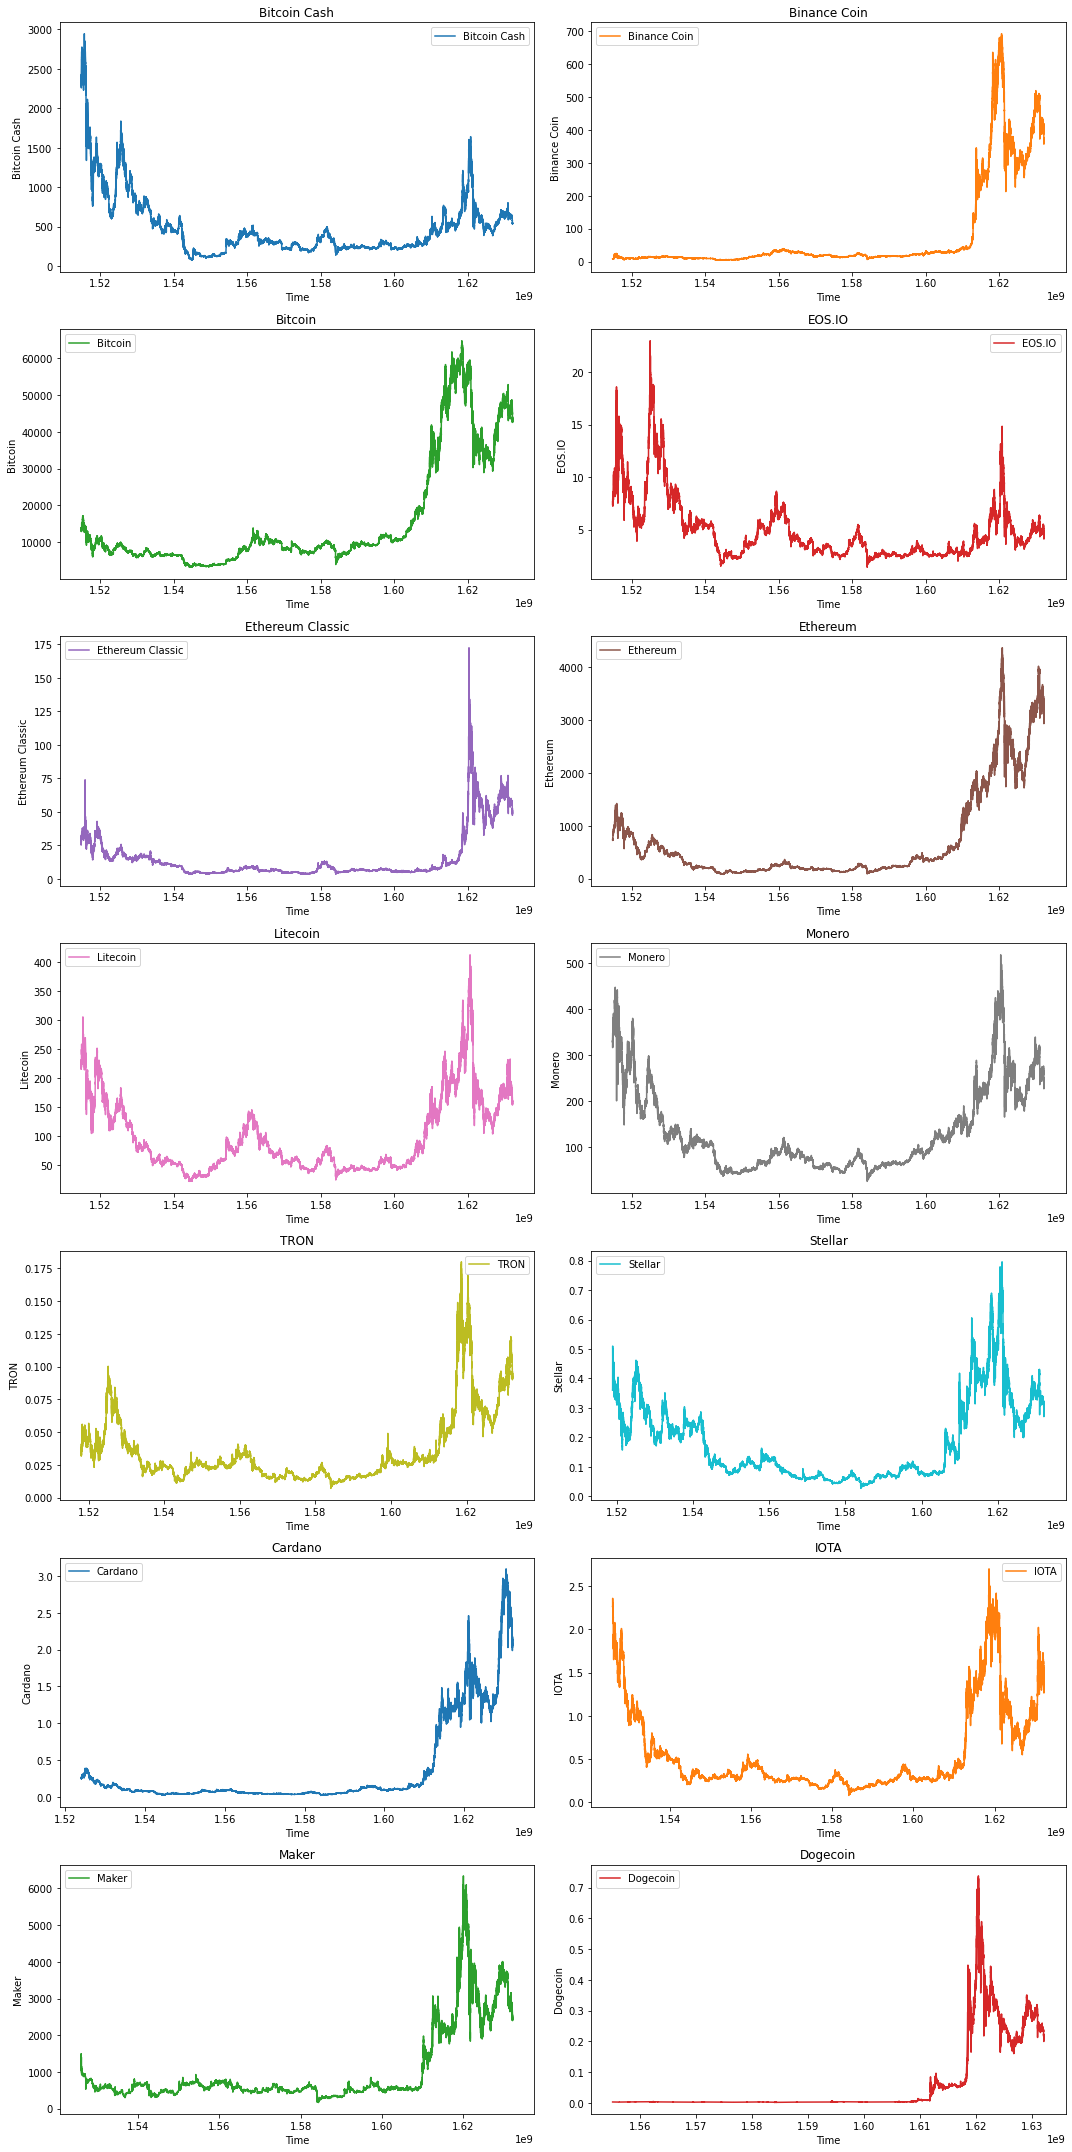

In [13]:
# plot close values as time series for all the assets
f = plt.figure(figsize=(15,30))

for ind, coin in enumerate(asset_names):
    coin_df = crypto_df[crypto_df["Asset_ID"]==asset_names_dict[coin]].set_index("timestamp")
    # fill missing values 
    coin_df = coin_df.reindex(range(coin_df.index[0],coin_df.index[-1]+60,60),method='pad')
    ax = f.add_subplot(7,2,ind+1)
    plt.plot(coin_df['Close'], label=coin, color=cmap[ind%10])
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel(coin)
    plt.title(coin)

plt.tight_layout()
plt.show()

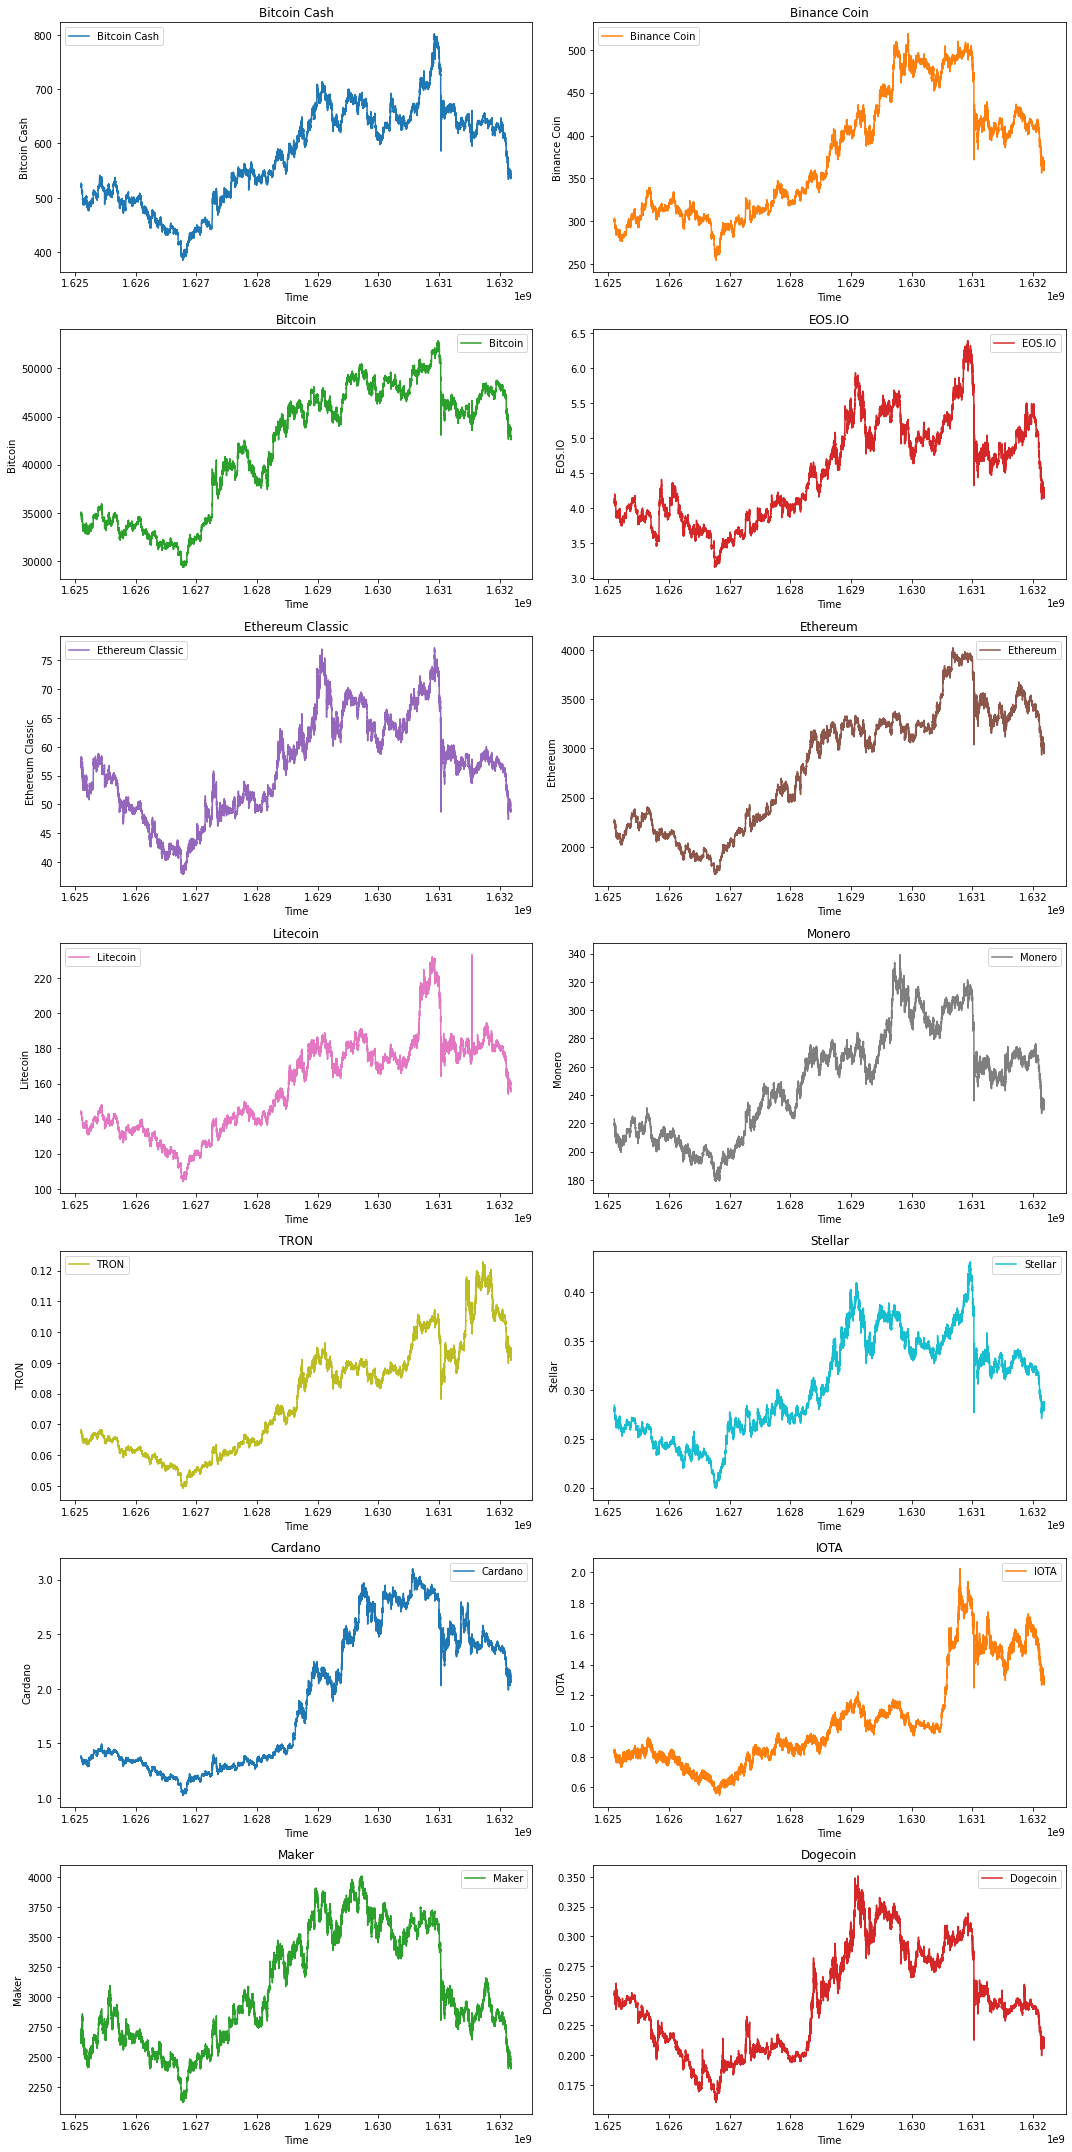

In [14]:
import time
# auxiliary function, from datetime to timestamp
totimestamp = lambda s: np.int32(time.mktime(datetime.datetime.strptime(s, "%d/%m/%Y").timetuple()))

# create intervals
f = plt.figure(figsize=(15,30))

for ind, coin in enumerate(asset_names):
    coin_df = crypto_df[crypto_df["Asset_ID"]==asset_names_dict[coin]].set_index("timestamp")
    # fill missing values 
    coin_df = coin_df.reindex(range(coin_df.index[0],coin_df.index[-1]+60,60),method='pad')
    coin_df = coin_df.loc[totimestamp('01/07/2021'):totimestamp('21/09/2021')]
    ax = f.add_subplot(7,2,ind+1)
    plt.plot(coin_df['Close'], label=coin, color=cmap[ind%10])
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel(coin)
    plt.title(coin)

plt.tight_layout()
plt.show()

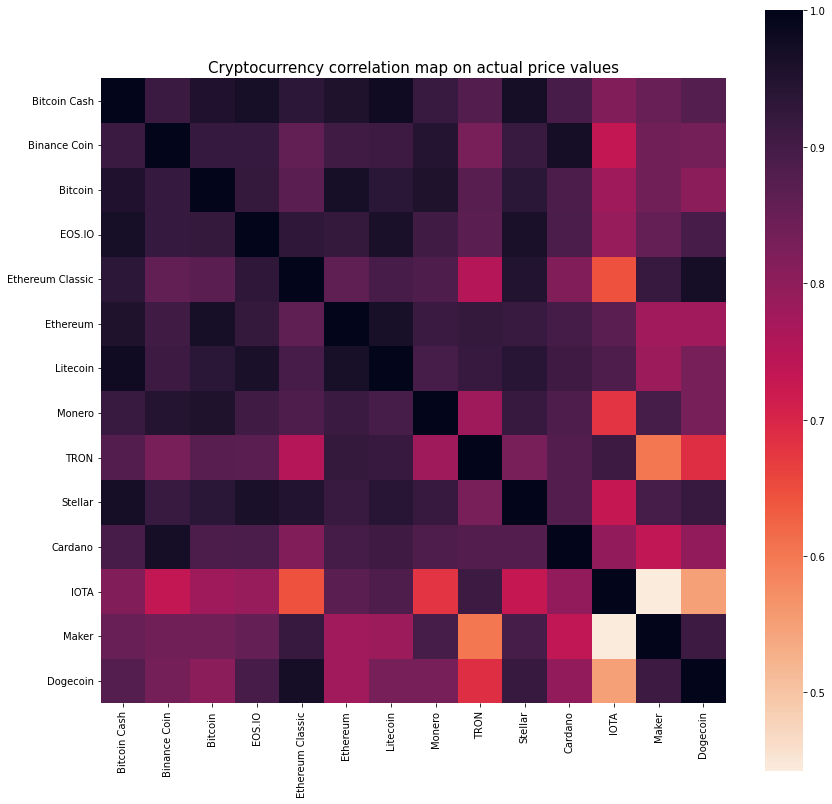

In [15]:
all_assets_df = pd.DataFrame([])
for ind, coin in enumerate(asset_names):
    coin_df = crypto_df[crypto_df["Asset_ID"]==asset_names_dict[coin]].set_index("timestamp")
    coin_df = coin_df.reindex(range(coin_df.index[0],coin_df.index[-1]+60,60),method='pad')
    # fill missing values
    coin_df = coin_df.loc[totimestamp('01/07/2021'):totimestamp('21/09/2021')]
    close_values = coin_df["Close"].fillna(0)
    close_values.name = coin
    all_assets_df = all_assets_df.join(close_values, how="outer")

corrmat = all_assets_df.corr()
fig, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(corrmat, vmax=1., square=True, cmap="rocket_r")
plt.title("Cryptocurrency correlation map on actual price values", fontsize=15)
plt.show()

In [16]:
# define function to compute log returns
def log_return(series, periods=1):
    return np.log(series).diff(periods=periods)

In [17]:
from bokeh.models import Panel, Tabs
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

output_notebook()

def get_plots(df, col1, col2):
    p = figure(plot_width=1000, plot_height=500, title=f"{col1} & {col2} - correlation distribution over time")
    p.line(df['timestamp'], df[col1], alpha=0.7)
    return p

main_tabs_list = []
for coin1 in ['Bitcoin', 'Ethereum', 'Dogecoin', 'IOTA']:
    tab_list = []
    coin_df = crypto_df[crypto_df["Asset_ID"]==asset_names_dict[coin1]].set_index("timestamp")
    coin_df = coin_df.reindex(range(coin_df.index[0],coin_df.index[-1]+60,60),method='pad')
    return1_values = log_return(coin_df["Close"].fillna(0))[1:]
    return1_values.name = coin1
    for coin2 in asset_names:
        if coin2 != coin1:
            coin_df = crypto_df[crypto_df["Asset_ID"]==asset_names_dict[coin2]].set_index("timestamp")
            coin_df = coin_df.reindex(range(coin_df.index[0],coin_df.index[-1]+60,60),method='pad')
            return2_values = log_return(coin_df["Close"].fillna(0))[1:]
            return2_values.name = coin2
            two_assets = pd.concat([return1_values, return2_values], axis=1)
            corr_time_df = two_assets.groupby(two_assets.index//(10000*60)).corr().loc[:,coin1].loc[:,coin2].reset_index()
            p = get_plots(corr_time_df, coin1, coin2)
            tab = Panel(child=p, title=f"Corr:{coin1} & {coin2}")
            tab_list.append(tab)
    tabs = Tabs(tabs=tab_list)
    panel = Panel(child=tabs, title=coin1)
    main_tabs_list.append(panel)
            

tabs = Tabs(tabs=main_tabs_list)
show(tabs)

Loading BokehJS ...